X_Train Shape:  (480, 6)
X_Test Shape:  (120, 6)
Y_Train Shape:  (480,)
Y_Test Shape:  (120,)
Epoch 1/200
15/15 [==============================] - 1s 7ms/step - loss: 2.4551 - accuracy: 0.2521
Epoch 2/200
15/15 [==============================] - 0s 7ms/step - loss: 2.4121 - accuracy: 0.3438
Epoch 3/200
15/15 [==============================] - 0s 6ms/step - loss: 2.3675 - accuracy: 0.3479
Epoch 4/200
15/15 [==============================] - 0s 6ms/step - loss: 2.3141 - accuracy: 0.3500
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 2.2468 - accuracy: 0.3542
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 2.1690 - accuracy: 0.3521
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 2.0815 - accuracy: 0.3583
Epoch 8/200
15/15 [==============================] - 0s 6ms/step - loss: 1.9872 - accuracy: 0.3875
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 1.8948 - accuracy: 0.4125
Epoch 10/200
15

15/15 [==============================] - 0s 6ms/step - loss: 0.3965 - accuracy: 0.8313
Epoch 83/200
4/4 [==============================] - 0s 6ms/step


C:\Users\shaif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaif\AppData\Local\Temp\ipykernel_22624\3442744243.py:122: RuntimeWarning: invalid value encountered in true_divide
  recall1 = np.round((TP / (TP + FN)),decimals=2)


Combination:Phase_angle_80_tf  Accuracy: 0.825
Precision: 0.7893  Recall: 0.825  F1-SCORE: 0.7976
Combination:Phase_angle_80_tf  Accuracy_Matrix: [1.   0.99 0.98 0.92 0.92 0.99 0.99 0.93 0.92 1.   0.99 1.  ]
Precision_Matrix: [1.  0.9 0.8 0.  1.  0.9 1.  0.8 0.5 1.  1.  1. ]
  Recall_MAtrix: [1.   1.   1.    nan 0.53 1.   0.91 0.57 0.56 1.   0.91 1.  ]
 F1-SCORE_Matrix: [1.   0.95 0.89  nan 0.69 0.95 0.95 0.67 0.53 1.   0.95 1.  ]


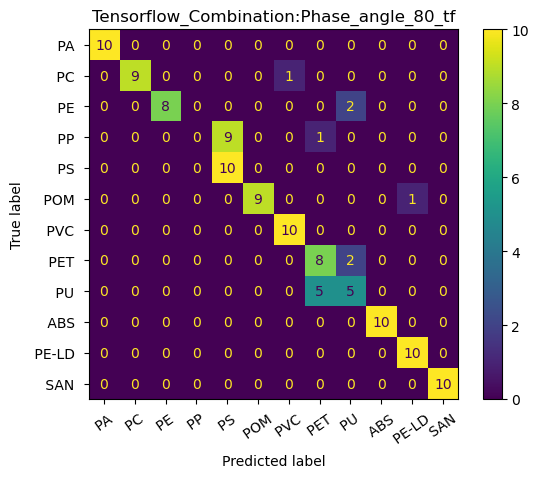

In [25]:
from os import system
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import numpy as np
import pickle
import sys
import tensorflow as tf

"""Before starting the MLP check your path"""

path = "phi_080_all_data.csv"


data = pd.read_csv(path)


name ="Phase_angle_80_tf"


data = data.iloc[:, 1:]




le = LabelEncoder()
sc = StandardScaler()
data['polymer'] = le.fit_transform(data["polymer"])
data[data.columns[2:]]=sc.fit_transform(data[data.columns[2:]])
# data[['mean(nid)' ,'Median(nid)','IQR(nid)','Range(nid)']] = sc.fit_transform(data[['mean(nid)','Median(nid)','IQR(nid)','Range(nid)']])




Y = data.iloc[:, 0]
X = data.iloc[:, 7:]


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, shuffle=True, stratify=Y)

print("X_Train Shape: ", x_train.shape)
print("X_Test Shape: ", x_test.shape)
print("Y_Train Shape: ", y_train.shape)
print("Y_Test Shape: ", y_test.shape)


# mlp = MLPClassifier(max_iter=200, random_state=1, verbose=True, activation='relu', alpha=0.0001,
                    # hidden_layer_sizes=(256, 128, 64, 32), learning_rate='adaptive', solver='adam', shuffle=True, early_stopping=True)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=512, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='softmax'))
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
ann.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

ann.fit(x_train, y_train, batch_size = 32, epochs = 200,callbacks=[callback],verbose=1)
# callbacks=[callback]
# def start_gridsearch():
#     parameter_space = {
#         'hidden_layer_sizes': [(512, 256, 128), (512, 256, 128, 64), (256, 128, 64), (256, 128, 64, 32)],
#         'activation': ['relu', 'tanh', 'identity', 'logistic'],
#         'solver': ['sgd', 'adam', 'lbfgs'],
#         'alpha': [0.0001, 0.05, 0.00001],
#         'learning_rate': ['constant', 'adaptive'],
#     }

#     clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
#     grid_search = clf.fit(x_train, y_train)

#     print('Best parameters found:\n', clf.best_params_)
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


# def one_hot_validation(X, Y):
#     kf = KFold(n_splits=5, shuffle=True)
#     enc = OneHotEncoder()
#     Y = np.array(Y)
#     Y = Y.reshape(len(Y), 1)
#     Y = enc.fit_transform(Y)

#     result = cross_val_score(mlp, X, Y, cv=kf)
#     print('Avg accuracy: {}'.format(result.mean()))


def accuracy(confucion_matrix):
    diagonal_sum = confucion_matrix.trace()
    sum_of_all_elements = confucion_matrix.sum()
    return diagonal_sum / sum_of_all_elements


# ann.fit(x_train, y_train)
def performance_measurment(cm):
   
    FP = cm.sum(axis=1) - np.diag(cm)  
    FN = cm.sum(axis=0) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    ACC1 = np.round((TP+TN)/(TP+FP+FN+TN),decimals=2)
    precision1 = np.round((TP / (TP + FP)),decimals=2)
    recall1 = np.round((TP / (TP + FN)),decimals=2)
    F1_SCORE1 = np.round((2*recall1*precision1)/(recall1+precision1),decimals=2)

    
    return ACC1, precision1, recall1, F1_SCORE1





y_pred = ann.predict(x_test)
y_pred_org = []
for i in range(len(y_pred)):
    y_pred_org.append(np.argmax(y_pred[i]))

y_pred_org = np.array(y_pred_org)
# print(y_test[0])
# print(np.argmax(y_pred[0]))
precision=round(precision_score(y_test, y_pred_org,average='weighted'),4)
recall=round(recall_score(y_test, y_pred_org,average='weighted'),4)
accuracy=round(accuracy_score(y_test, y_pred_org),4)
F1_SCORE=round(f1_score(y_test, y_pred_org,average='weighted'),4)

cm = confusion_matrix(y_test, y_pred_org)
ACC1, precision1, recall1, F1_SCORE1 = performance_measurment(cm)

# acc = accuracy(cm)

class_names = [" PA ", " PC ", " PE ", " PP ", " PS "," POM "," PVC "," PET "," PU "," ABS "," PE-LD "," SAN "]
#plot_confusion_matrix(ann, x_test, y_test, display_labels=class_names)
degrees = 35
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=degrees)

plt.title("Tensorflow:" + str(name))
print("Combination:" + str(name) +"  Accuracy: " + str(accuracy) +  "\nPrecision: "+ str(precision)+"  Recall: "+ str(recall)  + "  F1-SCORE: "+ str(F1_SCORE))
print("Combination:" + str(name) +"  Accuracy_Matrix: " + str(ACC1) +  "\nPrecision_Matrix: "+ str(precision1) +"\n  Recall_MAtrix: "+ str(recall1) + "\n F1-SCORE_Matrix: "+ str(F1_SCORE1))
plt.savefig('phy_080_tensorflow.png')
#plt.savefig(r'C:\pyyy\auswertung\polymers\MLP_without_early_stopping\\' +name+"_tf_without_early_stopping.png")


In [13]:
data[data.columns[7:]]

,mean(nid),median(nid),standard_deviation(nid),variance(nid),iqr(nid),range(nid)
0,-0.026599,-0.091811,0.277333,0.089441,0.107857,0.546593
1,0.626956,0.579601,0.816228,0.780372,0.750930,0.803711
2,0.519193,0.455508,0.862905,0.846149,0.845356,0.726952
3,-0.208333,-0.270789,0.145177,-0.060754,-0.037649,0.565261
4,0.053989,-0.013628,0.377277,0.208061,0.225959,0.661228
...,...,...,...,...,...,...
595,-1.282707,-1.285334,-0.606436,-0.770813,-0.737708,-0.055023
596,-1.197856,-1.213166,-0.520149,-0.701755,-0.671066,-0.001234
597,-1.310620,-1.310008,-0.626726,-0.786582,-0.754383,-0.057129
598,-1.335047,-1.329805,-0.662204,-0.813726,-0.781529,-0.164593


In [9]:
X

0     -0.026599
1      0.626956
2      0.519193
3     -0.208333
4      0.053989
         ...   
595   -1.282707
596   -1.197856
597   -1.310620
598   -1.335047
599   -1.322987
Name: mean(nid), Length: 600, dtype: float64

In [10]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
595    11
596    11
597    11
598    11
599    11
Name: polymer, Length: 600, dtype: int32